# InStyle Net Promoter Score

##### Esse notebook visa identificar as possíveis causas de insatisfação dos clientes para eloborar um modelo de classificação. Baseado em um dataset do Kaggle. 

## Setup

In [169]:
!pip install sweetviz

In [29]:
!pip install boruta

In [168]:
!pip install pycaret

In [30]:

import pandas            as pd
import matplotlib.pyplot as plt
import sweetviz          as sv
import matplotlib.pyplot as plt
import xgboost           as xgb
import lightgbm          as lgb
import math

from boruta                  import BorutaPy
from sklearn.ensemble        import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing   import StandardScaler
from sklearn.ensemble        import GradientBoostingClassifier
from sklearn.svm             import SVC
from pycaret.classification  import *


## Preparação dos Dados

In [12]:
#Baixando o dataset 
df = pd.read_csv('/kaggle/input/instyle-nps/train.csv')
df1 = df

In [3]:
#Obeservando o dataset
df1.head()

In [6]:
#Oberservando as estatísticas descritivas
df1.describe()

,id,Age,Store distance,InStore wifi,Open/Close time convenient,Easy of online shopping,Store location,Toilet cleaning,Dressing room,Waiting room,Kids entertainment,Seller service,Showroom,Self-Store,Purchase service,Store Service,Cleanliness,Carrier delay in minutes,Delivery delay in minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
#Observando a natureza das variaveis do dataset
df1.dtypes

In [ ]:
#Verificando a presença de informações faltantes no dataset
df1.isna().sum()

In [13]:
#Elimindo as informações faltantes do dataset
df2 = df1.dropna(how='any')
df1.head()

,id,Gender,Customer Type,Age,Type of Purchase,Store size,Store distance,InStore wifi,Open/Close time convenient,Easy of online shopping,...,Kids entertainment,Seller service,Showroom,Self-Store,Purchase service,Store Service,Cleanliness,Carrier delay in minutes,Delivery delay in minutes,Satisfaction
0,70172,Male,Loyal Customer,13,Personal,Small,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,Neutral or Dissatisfaction
1,5047,Male,disloyal Customer,25,Gift,Large,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,Neutral or Dissatisfaction
2,110028,Female,Loyal Customer,26,Gift,Large,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,Satisfied
3,24026,Female,Loyal Customer,25,Gift,Large,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,Neutral or Dissatisfaction
4,119299,Male,Loyal Customer,61,Gift,Large,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,Satisfied


In [8]:
#Verificando a quantidade de valores únicos 
df2.nunique()

id                            103594
Gender                             2
Customer Type                      2
Age                               75
Type of Purchase                   2
Store size                         3
Store distance                  3802
InStore wifi                       6
Open/Close time convenient         6
Easy of online shopping            6
Store location                     6
Toilet cleaning                    6
Dressing room                      6
Waiting room                       6
Kids entertainment                 6
Seller service                     6
Showroom                           6
Self-Store                         5
Purchase service                   6
Store Service                      6
Cleanliness                        6
Carrier delay in minutes         445
Delivery delay in minutes        455
Satisfaction                       2
dtype: int64

## Processamento dos Dados

In [23]:
df3 = df2

#mapeando os valores textuais em cada coluna para valores numéricos
map_gender = {'Male': 0, 'Female': 1}
map_customertype = {'Loyal Customer': 0,'disloyal Customer': 1}
map_typeofpurchase = {'Gift': 0, 'Personal': 1}
map_storesize = {'Large': 0, 'Medium': 1, 'Small': 2}
map_satisfaction = {'Neutral or Dissatisfaction': 0, 'Satisfied': 1}

df3['Gender'] = df3['Gender'].map(map_gender)
df3['Customer Type'] = df3['Customer Type'].map(map_customertype)
df3['Type of Purchase'] = df3['Type of Purchase'].map(map_typeofpurchase)
df3['Store size'] = df3['Store size'].map(map_storesize)
df3['Satisfaction'] = df3['Satisfaction'].map(map_satisfaction)

/tmp/ipykernel_32/2264502181.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Gender'] = df3['Gender'].map(map_gender)
/tmp/ipykernel_32/2264502181.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Customer Type'] = df3['Customer Type'].map(map_customertype)
/tmp/ipykernel_32/2264502181.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

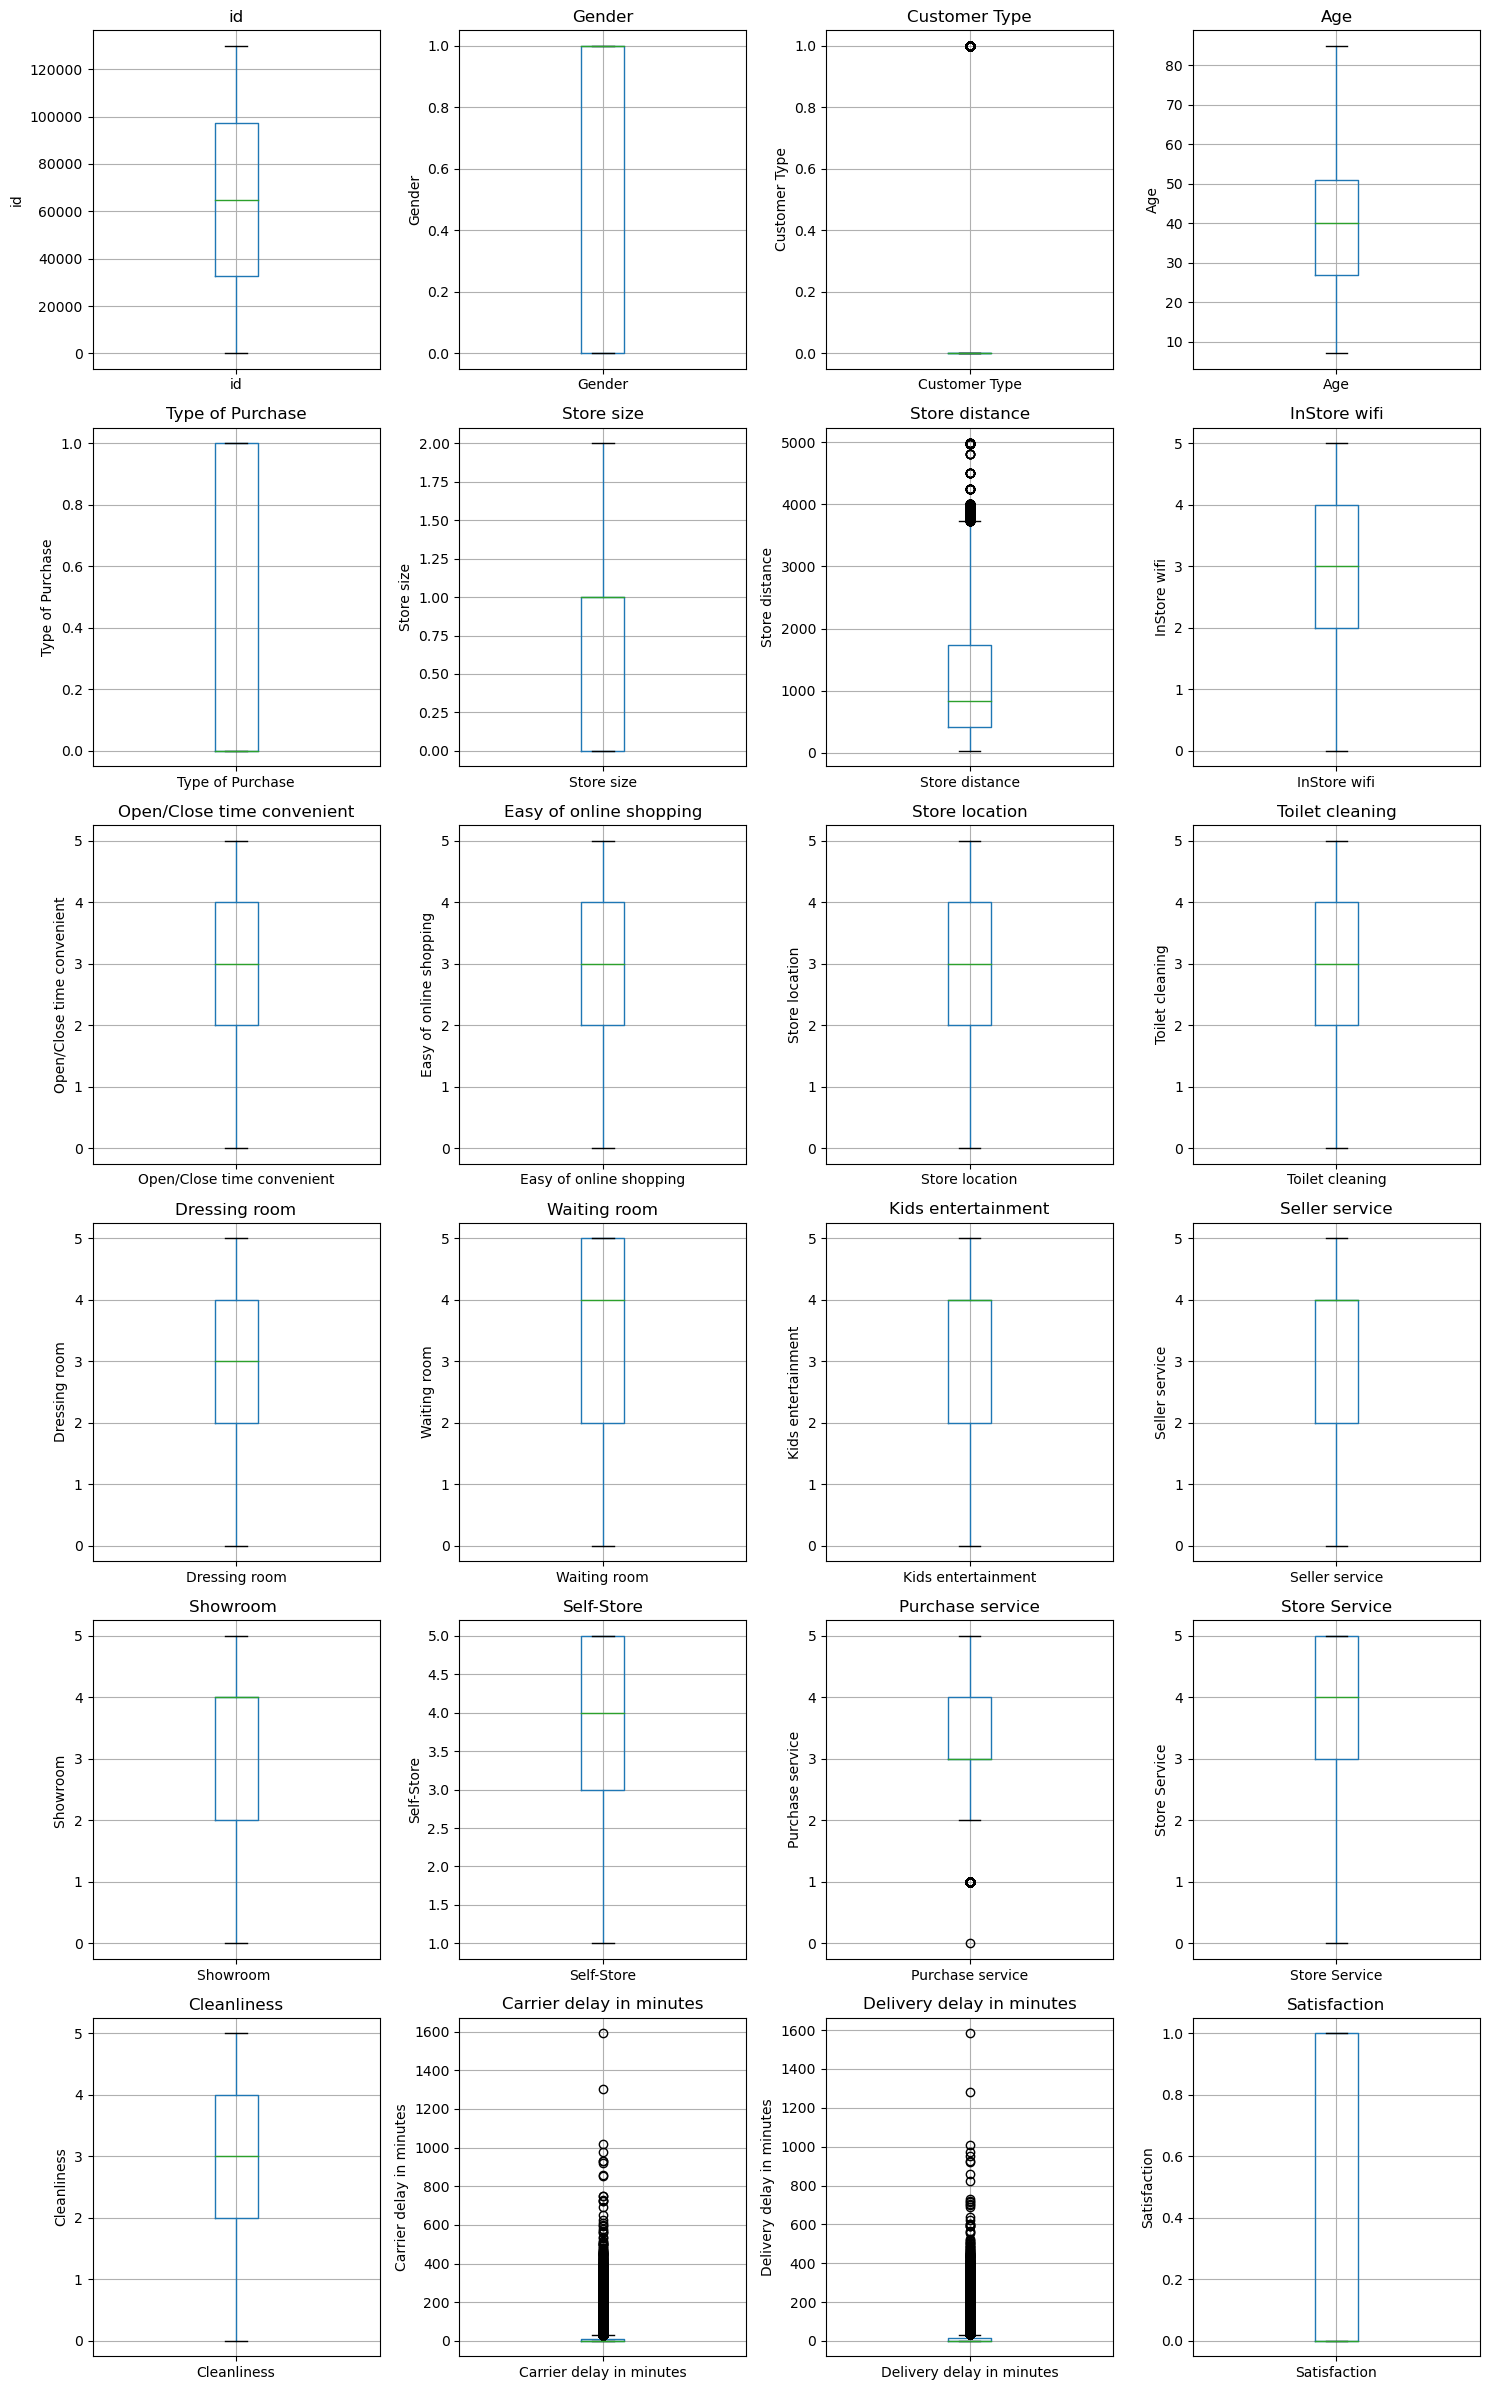

In [25]:
#Verificando a presença de outliers com gráficos boxplot
num_columns = len(df3.columns)
num_rows = math.ceil(num_columns / 4)  # Organiza em até 4 colunas por linha

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(15, num_rows * 4)) 
axes = axes.flatten()  # Transforma a matriz de subplots em um vetor

#Criando um loop para aprentação do gráfico para cada váriavel do dataset
for i, coluna in enumerate(df3.columns):
    df3.boxplot(column=coluna, ax=axes[i])
    axes[i].set_title(coluna)
    axes[i].set_ylabel(coluna)  

#Ajustando o layout para evitar sobreposição e espaçamento excessivo
plt.tight_layout()
plt.show()

In [ ]:
#Criando uma vizualição em gráfico atravéz do sweetviz
report_compare_intra = sv.compare_intra(df3,df3['Satisfaction'] == 1, ['Satisfied', 'Disatisfaction'])

In [ ]:
#Plotando o gráfico
report_compare_intra.show_notebook()

In [26]:
#Fazendo o Split dos Dados
df4 = df3
y = df4.pop('Satisfaction')
X = df4

## Feature Selection

In [31]:
#Rodando Boruta para identificação das variáveis mais importantes

rf = RandomForestClassifier(n_estimators=100, random_state=42)
boruta = BorutaPy(rf, n_estimators='auto', random_state=42, verbose=2)
boruta.fit(X.values,y.values)
#Separando as colunas selecionadas
selected_features = X.columns[boruta.support_].tolist()

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	20
Tentative: 	0
Rejected: 	3


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	20
Tentative: 	0
Rejected: 	3


In [32]:
#Criando um dataframe com a classificação das variáveis pelo Boruta

ranking = boruta.ranking_
ranking_df = pd.DataFrame({'Variável': X.columns, 'Ranking': ranking})
ranking_df.sort_values('Ranking', inplace=True)
print(ranking_df)

                      Variável  Ranking
0                           id        1
20                 Cleanliness        1
19               Store Service        1
18            Purchase service        1
17                  Self-Store        1
16                   Showroom         1
15              Seller service        1
14          Kids entertainment        1
13                Waiting room        1
12               Dressing room        1
11             Toilet cleaning        1
9      Easy of online shopping        1
8   Open/Close time convenient        1
7                 InStore wifi        1
6               Store distance        1
5                   Store size        1
4             Type of Purchase        1
3                          Age        1
2                Customer Type        1
10              Store location        1
22   Delivery delay in minutes        2
21    Carrier delay in minutes        3
1                       Gender        4


In [33]:
#Visualizando as variaveis selecionadas
print(selected_features)

['id', 'Customer Type', 'Age', 'Type of Purchase', 'Store size', 'Store distance', 'InStore wifi', 'Open/Close time convenient', 'Easy of online shopping', 'Store location', 'Toilet cleaning', 'Dressing room', 'Waiting room', 'Kids entertainment', 'Seller service', 'Showroom ', 'Self-Store', 'Purchase service', 'Store Service', 'Cleanliness']


In [193]:
#Eliminando as colunas com pouca importância
colls_drop = ['Gender','Carrier delay in minutes', 'Delivery delay in minutes']
X = X.drop(colls_drop, axis=1)

In [177]:
#Normalização dos dados
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

## Preparando Modelo

In [80]:
#Teste com modelo xgboost
ml_xgb = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100)

In [131]:
#Teste com modelo SVC
ml_SVC = SVC(C=1.0, kernel='rbf', gamma='scale')

In [205]:
#Teste com modelo Gradient Boosting
ml_gb = GradientBoostingClassifier()

In [194]:
#Teste com modelo LightGBM
ml_lgb = lgb.LGBMClassifier(boosting_type = 'gbdt', 
                            class_weight = None,
                            colsample_bytree = 1.0,
                            importance_type = 'split',
                            learning_rate = 0.1,
                            max_depth = -1,
                            min_child_samples = 20,
                            min_child_weight = 0.001,
                            min_split_gain = 0.0,
                            n_estimators = 100,
                            n_jobs = -1,
                            num_leaves = 31, 
                            objective = None,
                            random_state = None, 
                            reg_alpha = 0.0, 
                            reg_lambda = 0.0,
                            silent = 'warn',
                            subsample = 1.0,
                            subsample_for_bin = 200000,
                            subsample_freq = 0)

In [166]:
#Configurando PyCaret 
clf = setup(df3, target='Satisfaction')

In [165]:
#Tunando modelo com PyCaret
tuned_model = tune_model(ml_lgb)

In [167]:
#Criando variável com melhores parâmetros
best_params = tuned_model.get_params()
print(best_params)

In [210]:
#Testando modelo com cross validation
n_folds = 5
kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
scores = cross_val_score(ml_lgb, X, y, cv=kfold, scoring='precision_micro')

In [211]:
#Vizualizando resultados
print('Desempenho em cada fold:', scores)
print('Desempenho médio:', scores.mean())
print('Desvio padrão do desempenho:', scores.std())

Desempenho em cada fold: [0.96606979 0.96457358 0.96365655 0.96457358 0.96616469]
Desempenho médio: 0.9650076370933706
Desvio padrão do desempenho: 0.0009663532093535332


In [197]:
#Configurando modelo aos dados
ml_lgb.fit(X, y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# Teste

In [198]:
#Baixando dados de teste
df_test = pd.read_csv('/kaggle/input/instyle-nps/test.csv')

In [199]:
#Eliminando informações faltantes dos dados de teste
df_test.dropna(how='any')

,id,Gender,Customer Type,Age,Type of Purchase,Store size,Store distance,InStore wifi,Open/Close time convenient,Easy of online shopping,...,Waiting room,Kids entertainment,Seller service,Showroom,Self-Store,Purchase service,Store Service,Cleanliness,Carrier delay in minutes,Delivery delay in minutes
0,19556,Female,Loyal Customer,52,Gift,Medium,160,5,4,3,...,3,5,5,5,5,2,5,5,50,44.0
1,90035,Female,Loyal Customer,36,Gift,Large,2863,1,1,3,...,5,4,4,4,4,3,4,5,0,0.0
2,12360,Male,disloyal Customer,20,Gift,Medium,192,2,0,2,...,2,2,4,1,3,2,2,2,0,0.0
3,77959,Male,Loyal Customer,44,Gift,Large,3377,0,0,0,...,4,1,1,1,1,3,1,4,0,6.0
4,36875,Female,Loyal Customer,49,Gift,Medium,1182,2,3,4,...,2,2,2,2,2,4,2,4,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Gift,Large,526,3,3,3,...,4,4,3,2,4,4,5,4,0,0.0
25972,71167,Male,Loyal Customer,23,Gift,Large,646,4,4,4,...,4,4,4,5,5,5,5,4,0,0.0
25973,37675,Female,Loyal Customer,17,Personal,Medium,828,2,5,1,...,2,2,4,3,4,5,4,2,0,0.0
25974,90086,Male,Loyal Customer,14,Gift,Large,1127,3,3,3,...,4,4,3,2,5,4,5,4,0,0.0


In [200]:
#Aplicando encooding nos dados de teste
map_gender = {'Male': 0, 'Female': 1}
map_customertype = {'Loyal Customer': 0,'disloyal Customer': 1}
map_typeofpurchase = {'Gift': 0, 'Personal': 1}
map_storesize = {'Large': 0, 'Medium': 1, 'Small': 2}

df_test['Gender'] = df_test['Gender'].map(map_gender)
df_test['Customer Type'] = df_test['Customer Type'].map(map_customertype)
df_test['Type of Purchase'] = df_test['Type of Purchase'].map(map_typeofpurchase)
df_test['Store size'] = df_test['Store size'].map(map_storesize)

In [201]:
#Eliminando váriaveis de baixa importância
df_test = df_test.drop(colls_drop, axis=1)

In [186]:
#Normalizando os dados
scaler = StandardScaler()
df_test_normalized = scaler.fit_transform(df_test)

In [203]:
#Configurando modelo ao teste e criando submissão 
predictions = ml_lgb.predict(df_test)
submission = pd.read_csv('/kaggle/input/instyle-nps/submission.csv')
submission['Satisfaction'] = predictions
submission.to_csv('submission-2.csv', index=False)